In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import progressbar
import scipy.signal

In [2]:
def init(l):
    rho[0]=0.01
    if l==0:
        R[0]=1
        dR[0]=-1
    if l>=1:
        R[0]=0
        dR[0]=1



    

In [3]:
def euler(l,e):
    global rho
    global R
    global dR
 
    minr=0.01
    maxr=30
    dx=0.01
    N=int((maxr-minr)/dx)
    #print(N)
    rho=np.zeros(N+1)
    R=np.zeros(N+1)
    dR=np.zeros(N+1)
    ddR=np.zeros(N+1)
    
    init(l)

    ddR[0]=-(2*dR[0]/rho[0])+((l*(l+1))/(rho[0]**2)-(2/rho[0])-e )*R[0]
    for i in range(0,N): 
        rho[i+1]=rho[i]+dx
        R[i+1]= dR[i]*dx + R[i]
        dR[i+1]= ddR[i]*dx + dR[i]
        ddR[i+1]= -(2*dR[i+1]/rho[i+1])+((l*(l+1))/(rho[i+1]**2)-(2/rho[i+1])-e )*R[i+1]
        
        
    return(rho,R,)
        

In [4]:
euler(1,-0.251257)

(array([1.000e-02, 2.000e-02, 3.000e-02, ..., 2.998e+01, 2.999e+01,
        3.000e+01]),
 array([0.        , 0.01      , 0.        , ..., 0.40360729, 0.40520443,
        0.40680804]))

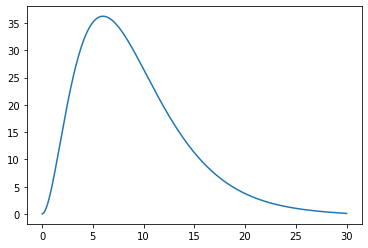

In [30]:
plt.plot(euler(2,-0.111122)[0],euler(2,-0.111122)[1])
#plt.ylim(-5,5)

In [6]:
def normalize(X,Y):
    norm=np.trapz(Y**2,X)
    return Y/np.sqrt(norm)

In [7]:
def renergies(n):
    array=np.linspace(1,n+1,n+1)
    new=[]
    for i in range(n):
        new.append(-1/(array[i]**2))
    return np.asarray(new)

#def orbitals(n):
 #   r=n
  #  orbnames={"1s":2,"2s":2,"1p":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,"1s":2,}
   # 
    #while(r != 0):

[-1.00000000e+00 -2.50000000e-01 -1.11111111e-01 -6.25000000e-02
 -4.00000000e-02 -2.77777778e-02 -2.04081633e-02 -1.56250000e-02
 -1.23456790e-02 -1.00000000e-02 -8.26446281e-03 -6.94444444e-03
 -5.91715976e-03 -5.10204082e-03 -4.44444444e-03 -3.90625000e-03
 -3.46020761e-03 -3.08641975e-03 -2.77008310e-03 -2.50000000e-03
 -2.26757370e-03 -2.06611570e-03 -1.89035917e-03 -1.73611111e-03
 -1.60000000e-03 -1.47928994e-03 -1.37174211e-03 -1.27551020e-03
 -1.18906064e-03 -1.11111111e-03 -1.04058273e-03 -9.76562500e-04
 -9.18273646e-04 -8.65051903e-04 -8.16326531e-04 -7.71604938e-04
 -7.30460190e-04 -6.92520776e-04 -6.57462196e-04 -6.25000000e-04
 -5.94883998e-04 -5.66893424e-04 -5.40832883e-04 -5.16528926e-04
 -4.93827160e-04 -4.72589792e-04 -4.52693526e-04 -4.34027778e-04
 -4.16493128e-04 -4.00000000e-04 -3.84467512e-04 -3.69822485e-04
 -3.55998576e-04 -3.42935528e-04 -3.30578512e-04 -3.18877551e-04
 -3.07787011e-04 -2.97265161e-04 -2.87273772e-04 -2.77777778e-04
 -2.68744961e-04 -2.60145

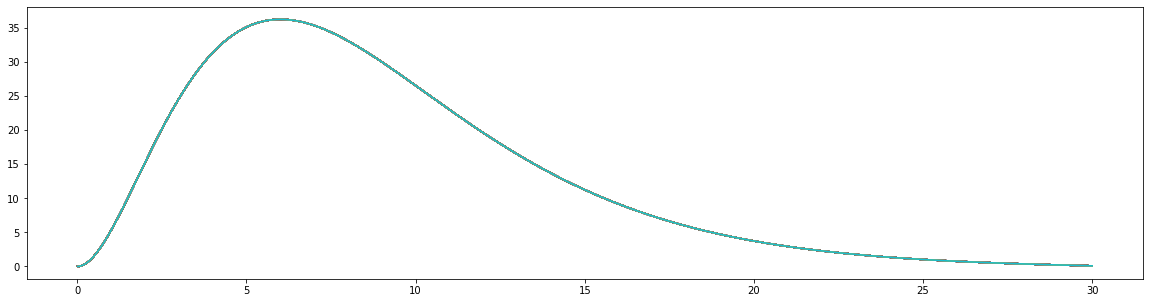

In [29]:
test=100
values=renergies(test)
print(values)
plt.figure(figsize=(20,5))
for i in range(test):
    plt.plot(euler(0,values[i])[0],euler(0,values[i])[1])
    


In [261]:
def findconv(N):
    
    energies2=np.random.uniform(-1,0.01,N)
    #print(energies2)
    bar = progressbar.ProgressBar(max_value=N)
    
    plt.figure(figsize=(30,20))
    for i in range(len(energies2)):
        actual=np.sqrt(-1/energies2[i])
        #print (actual)
        for j in range(int(actual)):
            plt.plot(euler(j,energies2[i])[0],euler(j,energies2[i])[1])
            if (np.abs(euler(j,energies2[i])[1][1500])<0.001):
                print (energies2[i],euler(j,energies2[i])[1][1500],j)
    plt.ylim(-10,10)
    
    


100% (100 of 100) |######################| Elapsed Time: 0:00:00 ETA:  00:00:00


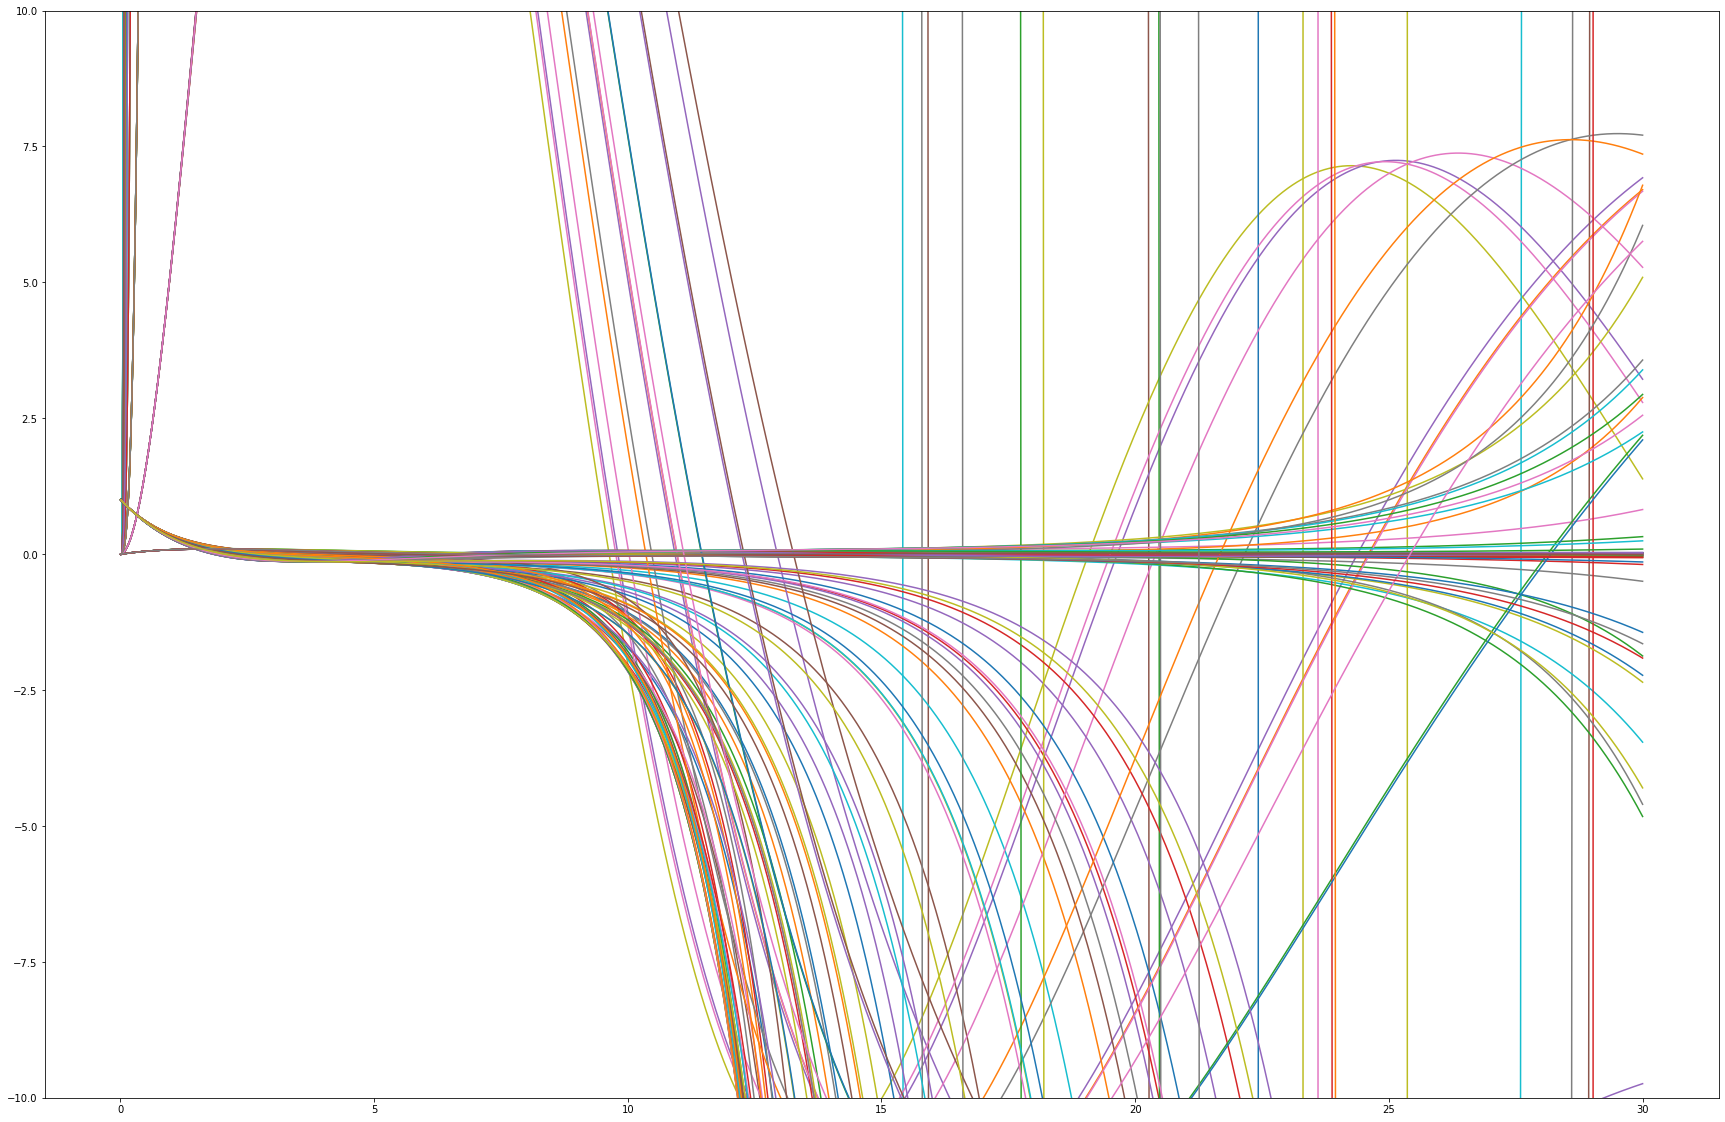

In [262]:
findconv(100)

Text(0, 0.5, '$R(p)$')

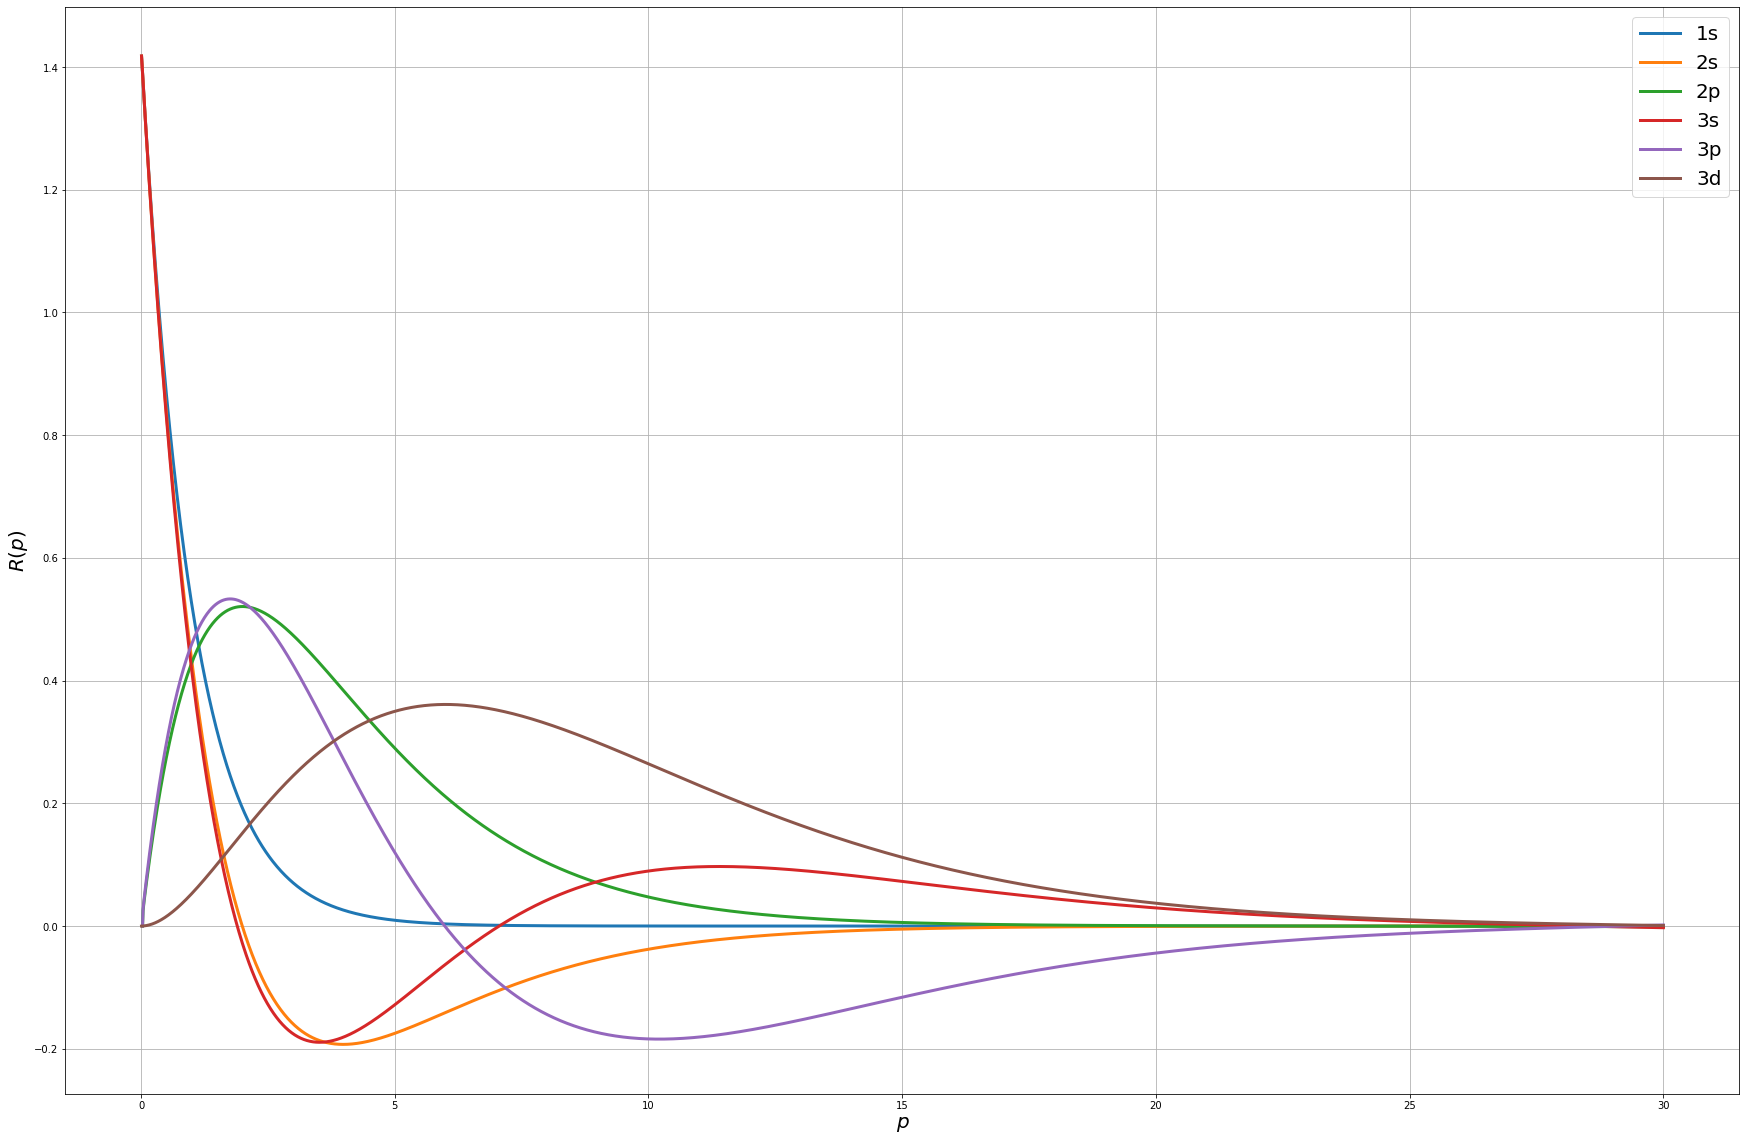

In [9]:
plt.figure(figsize=(30,20))
plt.plot(euler(0,-1)[0],normalize(euler(0,-1)[0],euler(0,-1)[1]),label="1s",linewidth=3)
plt.plot(euler(0,-0.251257)[0],normalize(euler(0,-0.251257)[0],euler(0,-0.251257)[1]),label="2s",linewidth=3)
plt.plot(euler(1,-0.25103)[0][2:],normalize(euler(1,-0.25125)[0][2:],euler(1,-0.250415)[1][2:]),label="2p",linewidth=3)
plt.plot(euler(0,-0.111122)[0],normalize(euler(0,-0.111122)[0],euler(0,-0.111122)[1]),label="3s",linewidth=3)
plt.plot(euler(1,-0.111122)[0][2:],normalize(euler(1,-0.111122)[0][2:],euler(1,-0.111122)[1][2:]),label="3p",linewidth=3)
plt.plot(euler(2,-0.111122)[0],normalize(euler(2,-0.111122)[0],euler(2,-0.111122)[1] ),label="3d",linewidth=3)
plt.grid()
plt.legend(fontsize=20)
plt.xlabel("$ p$",fontsize=20)
plt.ylabel("$R(p)$",fontsize=20)

In [33]:
def NormedPDF(XX,YY):
    newYY=(XX**2)*(YY**2)
    return newYY/np.sqrt(np.trapz(newYY,XX))

Text(0, 0.5, '$R(p)$')

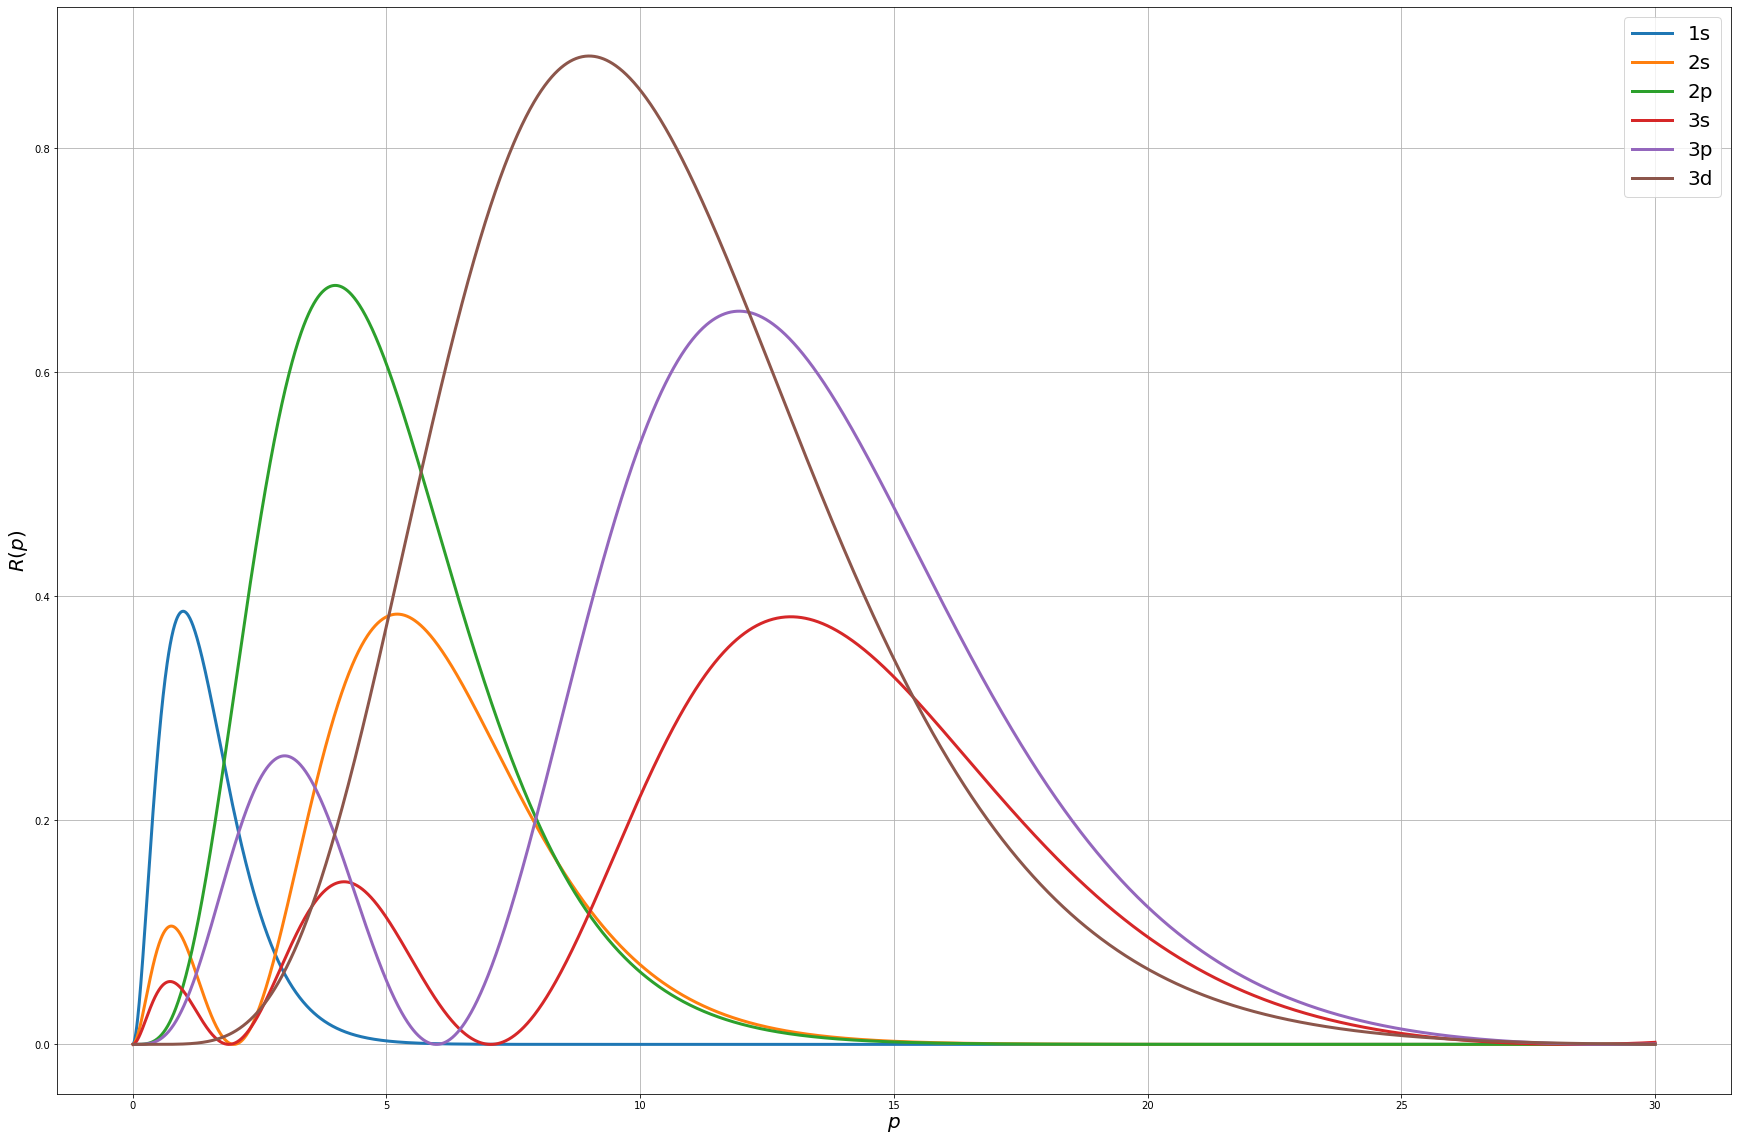

In [42]:
plt.figure(figsize=(30,20))
plt.plot(euler(0,-1)[0],NormedPDF(euler(0,-1)[0],normalize(euler(0,-1)[0],euler(0,-1)[1])),label="1s",linewidth=3)
plt.plot(euler(0,-0.251257)[0],NormedPDF(euler(0,-0.251257)[0],normalize(euler(0,-0.251257)[0],euler(0,-0.251257)[1])),label="2s",linewidth=3)
plt.plot(euler(1,-0.25103)[0][2:],NormedPDF(euler(1,-0.25125)[0][2:],normalize(euler(1,-0.25125)[0][2:],euler(1,-0.250415)[1][2:])),label="2p",linewidth=3)
plt.plot(euler(0,-0.111122)[0],NormedPDF(euler(0,-0.111122)[0],normalize(euler(0,-0.111122)[0],euler(0,-0.111122)[1])),label="3s",linewidth=3)
plt.plot(euler(1,-0.111122)[0][2:],NormedPDF(euler(1,-0.111122)[0][2:],normalize(euler(1,-0.111122)[0][2:],euler(1,-0.111122)[1][2:])),label="3p",linewidth=3)
plt.plot(euler(2,-0.111122)[0],NormedPDF(euler(2,-0.111122)[0],normalize(euler(2,-0.111122)[0],euler(2,-0.111122)[1] )),label="3d",linewidth=3)
plt.grid()
plt.legend(fontsize=20)
plt.xlabel("$ p$",fontsize=20)
plt.ylabel("$R(p)$",fontsize=20)

In [58]:
def expectedvalue(X,Y):
    return np.trapz(Y*Y*X,X)

In [60]:
print(expectedvalue(euler(0,-1)[0],NormedPDF(euler(0,-1)[0],normalize(euler(0,-1)[0],euler(0,-1)[1]))))
print(expectedvalue(euler(0,-0.251257)[0],NormedPDF(euler(0,-0.251257)[0],normalize(euler(0,-0.251257)[0],euler(0,-0.251257)[1]))))
print(expectedvalue(euler(1,-0.25103)[0][2:],NormedPDF(euler(1,-0.25125)[0][2:],normalize(euler(1,-0.25125)[0][2:],euler(1,-0.250415)[1][2:]))))
print(expectedvalue(euler(0,-0.111122)[0],NormedPDF(euler(0,-0.111122)[0],normalize(euler(0,-0.111122)[0],euler(0,-0.111122)[1]))))
print(expectedvalue(euler(1,-0.111122)[0][2:],NormedPDF(euler(1,-0.111122)[0][2:],normalize(euler(1,-0.111122)[0][2:],euler(1,-0.111122)[1][2:]))))
print(expectedvalue(euler(2,-0.111122)[0],NormedPDF(euler(2,-0.111122)[0],normalize(euler(2,-0.111122)[0],euler(2,-0.111122)[1]))))

0.23673691746192144
2.934809685797249
7.366801869542415
12.189731436884262
33.65129482851374
49.593077093625354
